# Exploratory Analysis of an Ecommerce Data

Ecommerce firms operate online, selling products and services to customers around the world. Data is crucial for these businesses as it helps them understand customer behavior, what customers are buying, help to track sales performance and make informed decisions to improve their operations. 

By analyzing data from eCommerce transactions, the firm can discover insights that will optimize their marketing strategies and improve the overall customer experience. 

In this notebook, i explored and analyzed a dataset from an eCommerce platform to gain insights into sales,revenue, product performance and the effect of sales strategy (Discount). This exploratory analysis will provide valuable information that can drive strategic decisions and support business growth.

Data Source: <a href= https://www.kaggle.com/datasets/oleksiimartusiuk/e-commerce-data-shein> Kaggle Dataset </a>

# The structure of this notebook is as follows:

<li> First, We will start off by importing the necessary modules required.
<li> Then we will load our datasets. The dataset is a total of 21 csv files. 
<li> The dataset will then undergo some cleaning and preprocessing to ensure that our analysis yield the correct insights.
<li> Once we are sure our data is in the right shape, we will do some exploratory data analysis to build our intuitions.

# The following questions will be answered using the Ecommerce dataset:

<li> What are the top 10 best-selling products?
<li> What are the 10 least-selling products?
<li> Which products generate the top 10 highest revenue?
<li> Which products generate the 10 least revenue?
<li> What is the average price of the products?
<li> How does the price range vary across different products?
<li> Which products have the highest and lowest prices?
<li> How does the discount percentage affect sales volume?
<li> Are there any products with high discounts but low sales?
<li> Which products have the highest discounts, and how does that correlate with their sales?
<li> Which products are the most profitable
<li> How does the profitability vary across different products?






In [220]:
#importing modules to be used for the analysis
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob 
import re
import textwrap 
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

Since the dataset contains 21 csv files, adding each file one after the other will take a long time. As a result, we will use the glob module to get all the csv files that are in our project directory.


In [221]:
# Path to the directory containing the CSV files
path = r"C:\Users\USER\Documents\Data Science\E-commerce project\csv files"

# Use glob to get all the CSV files in the directory
all_files = glob.glob(path + r"\*.csv")

# List to hold individual DataFrames
dataframes = []

# Iterate over each file and read it into a DataFrame
for file in all_files:
    combined_df = pd.read_csv(file)
    dataframes.append(combined_df)



We now combine all the dataset and then save everything in one csv file. 

In [222]:
# Combine all DataFrames, using an outer join to retain all columns
df = pd.concat(dataframes, join='outer', ignore_index=True)

# We can save the combined DataFrame to a new CSV file (This is optional)
combined_df.to_csv("combined_dataset.csv", index=False)


First we load the dataset to have an understanding of the various columns available in the data.

In [223]:
# Display information and the first few rows of the combined DataFrame
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82105 entries, 0 to 82104
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goods-title-link--jump        664 non-null    object 
 1   goods-title-link--jump href   664 non-null    object 
 2   rank-title                    14605 non-null  object 
 3   rank-sub                      14605 non-null  object 
 4   price                         82103 non-null  object 
 5   discount                      54977 non-null  object 
 6   selling_proposition           54364 non-null  object 
 7   goods-title-link              81427 non-null  object 
 8   color-count                   19743 non-null  float64
 9   blackfridaybelts-bg src       3791 non-null   object 
 10  blackfridaybelts-content      3791 non-null   object 
 11  product-locatelabels-img src  3622 non-null   object 
dtypes: float64(1), object(11)
memory usage: 7.5+ MB


,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link,color-count,blackfridaybelts-bg src,blackfridaybelts-content,product-locatelabels-img src
0,1pc Rechargeable Deep Tissue Muscle Handheld M...,https://us.shein.com/1pc-Rechargeable-Deep-Tis...,#1 Best Sellers,in Give Gifts,$2.03,-22%,NaN,NaN,NaN,NaN,NaN,NaN
1,1pc Portable Hanging Neck Fan,https://us.shein.com/1pc-Portable-Hanging-Neck...,#4 Best Sellers,in Top rated in Portable Fans,$6.48,-20%,NaN,NaN,NaN,NaN,NaN,NaN
2,1pc Pink Colored Curved Eyelash Curler False E...,https://us.shein.com/1pc-Pink-Colored-Curved-E...,NaN,NaN,$1.80,NaN,400+ sold recently,NaN,NaN,NaN,NaN,NaN
3,1 Mini Portable Handheld Fan With 2 Aa Batteri...,https://us.shein.com/1-Mini-Portable-Handheld-...,NaN,NaN,$0.88,-72%,5.6k+ sold recently,NaN,NaN,NaN,NaN,NaN
4,"Wit Water Flosser,Portable Oral Irrigator With...",https://us.shein.com/Wit-Water-Flosser-Portabl...,#6 Best Sellers,in Oral Irrigators,$12.06,-40%,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82100,NaN,NaN,#2 Best Seller,In Modest World Apparel,$35.69,NaN,NaN,Colorful Flower Embroidered Linen Muslim Women...,NaN,NaN,NaN,NaN
82101,NaN,NaN,NaN,NaN,$42.49,NaN,10+ sold recently,Elegant And Stylish Patchwork Lace Cheongsam D...,NaN,NaN,NaN,NaN
82102,NaN,NaN,NaN,NaN,$49.29,NaN,200+ sold recently,Split Thigh Satin Tube Prom Dress,5.0,NaN,NaN,NaN
82103,NaN,NaN,#10 Best Seller,In Sexy Women Bottoms,$9.78,-5%,NaN,DAZY Women's Solid Color Low Waist Ultra Short...,6.0,NaN,NaN,NaN


# Data Cleaning and Preprocessing 

From the table above, we can see that there are lots of unwanted values including NaN in the dataset. 
As a result, there is a need to properly clean and process the data to be sure it is fit for an analysis.

We start this by stating only the columns wanted and renaming the columns to more clearer terms.
Then we check for and drop all duplicates in the product. 

In [224]:
#Reinstate columns to be used and remove unwanted columns
df = df[['goods-title-link--jump',
       'price', 'discount', 'selling_proposition'
       ]]

#Renaming the columns
df = df.rename(columns={'goods-title-link--jump':'Product Name', 'rank-title': 'Rank Title',
       'price':'Price', 'discount':'Discount', 'selling_proposition': 'Sales'})


In [225]:
#Removing duplicated products 
df = df.loc[~df.duplicated(subset=['Product Name'])] \
.reset_index(drop=True).copy()

df

,Product Name,Price,Discount,Sales
0,1pc Rechargeable Deep Tissue Muscle Handheld M...,$2.03,-22%,NaN
1,1pc Portable Hanging Neck Fan,$6.48,-20%,NaN
2,1pc Pink Colored Curved Eyelash Curler False E...,$1.80,NaN,400+ sold recently
3,1 Mini Portable Handheld Fan With 2 Aa Batteri...,$0.88,-72%,5.6k+ sold recently
4,"Wit Water Flosser,Portable Oral Irrigator With...",$12.06,-40%,NaN
...,...,...,...,...
648,Contrast Lace Satin Cami Night Dress,$6.89,NaN,1.7k+ sold recently
649,Women'S Cartoon Slogan Printed Cami Sleep Dress,$3.93,-20%,800+ sold recently
650,Heart Print Lettuce Trim Slip Nightdress,$3.31,-45%,500+ sold recently
651,Butterfly Print Cami Top & Shorts PJ Set,$5.37,-26%,1.1k+ sold recently


In [226]:
#Removing text associated with the values in the Sales column
df['Sales'] = df['Sales'].str.replace('+','')
df['Sales'] = df['Sales'].str.replace('k','')
df['Sales'] = df['Sales'].str.replace('sold recently','')

In [227]:
#Convert Sales column values to numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

#To render result as a whole number, confirm if value in Sales column is not NaN and if divided by 1, 
# its remainder does not equal to 0. If condition is met, multiply the values by 1000.
df['Sales'] = df['Sales'].apply(lambda x: x * 1000 if not pd.isna(x) and x % 1 != 0 else x )

#Afterwards, fill the NaN values with 0 and convert the whole column to integer.
df['Sales'] = df['Sales'].fillna(0).astype(int)
df

,Product Name,Price,Discount,Sales
0,1pc Rechargeable Deep Tissue Muscle Handheld M...,$2.03,-22%,0
1,1pc Portable Hanging Neck Fan,$6.48,-20%,0
2,1pc Pink Colored Curved Eyelash Curler False E...,$1.80,NaN,400
3,1 Mini Portable Handheld Fan With 2 Aa Batteri...,$0.88,-72%,5600
4,"Wit Water Flosser,Portable Oral Irrigator With...",$12.06,-40%,0
...,...,...,...,...
648,Contrast Lace Satin Cami Night Dress,$6.89,NaN,1700
649,Women'S Cartoon Slogan Printed Cami Sleep Dress,$3.93,-20%,800
650,Heart Print Lettuce Trim Slip Nightdress,$3.31,-45%,500
651,Butterfly Print Cami Top & Shorts PJ Set,$5.37,-26%,1100


In [228]:
#Remove unwanted symbolds from the Price and discount columns
df['Price'] = df['Price'].str.lstrip('$')
df['Discount'] = df['Discount'].str.lstrip('-')
df['Discount'] = df['Discount'].str.replace('%','')


In [229]:
#Removing NaN in Discount column values and filling with nothing
df['Discount'] = df['Discount'].fillna('')

#iteratring over dataframe to locate and remove empty cells in Discount column
for x in df.index:
    if df.loc[x, 'Discount'] == '':
        df.drop(x, inplace=True)
df.reset_index(drop=True)

,Product Name,Price,Discount,Sales
0,1pc Rechargeable Deep Tissue Muscle Handheld M...,2.03,22,0
1,1pc Portable Hanging Neck Fan,6.48,20,0
2,1 Mini Portable Handheld Fan With 2 Aa Batteri...,0.88,72,5600
3,"Wit Water Flosser,Portable Oral Irrigator With...",12.06,40,0
4,6 Modes Multi-Functional Sonic Electric Toothb...,4.28,41,0
...,...,...,...,...
530,Sheer Mesh Insert Rib-knit Tank Top & Shorts P...,5.73,43,700
531,Women'S Cartoon Slogan Printed Cami Sleep Dress,3.93,20,800
532,Heart Print Lettuce Trim Slip Nightdress,3.31,45,500
533,Butterfly Print Cami Top & Shorts PJ Set,5.37,26,1100


Remember we had earlier changed the NaN values in Sales column to 0. 
Now we have to remove all the rows in the dataset where Sales column is 0.

In [230]:
#Remove rows where values are 0 in Sales column
df = df[df['Sales'] != 0].reset_index(drop=True)

#convert Price column to float data type and Discount column to integer data type 
df['Price'] = pd.to_numeric(df['Price']).astype(float)
df['Discount'] = pd.to_numeric(df['Discount']).astype(int)

df


,Product Name,Price,Discount,Sales
0,1 Mini Portable Handheld Fan With 2 Aa Batteri...,0.88,72,5600
1,"3pcs/Set Laundry Drying Balls, 6cm Reusable Ho...",1.49,55,60
2,Mini Portable USB Charging Sealing Machine For...,2.15,50,100
3,1pc Plain Egg Separator,0.74,47,100
4,1PC 16LED USB/Battery Dual Use Makeup Mirror L...,8.55,29,200
...,...,...,...,...
265,Sheer Mesh Insert Rib-knit Tank Top & Shorts P...,5.73,43,700
266,Women'S Cartoon Slogan Printed Cami Sleep Dress,3.93,20,800
267,Heart Print Lettuce Trim Slip Nightdress,3.31,45,500
268,Butterfly Print Cami Top & Shorts PJ Set,5.37,26,1100


As seen above, we can see that our data went from 82105 rows and 12 columns
to 270 rows and 4 columns after cleaning the data and focusing on the relevant columns (Variables) 
that we will be using for our exploratory analysis.

In [231]:
df = df.rename(columns={'Sales': 'Units Sold'}) 

#Then Units sold column was converted to integer data type
df['Units Sold'] = df['Units Sold'].astype(int)

#Total Revenue column (variable) created
df['Total Revenue'] = df['Units Sold'] * df['Price']
df['Total Revenue'] = df['Total Revenue'].astype(int)

df

,Product Name,Price,Discount,Units Sold,Total Revenue
0,1 Mini Portable Handheld Fan With 2 Aa Batteri...,0.88,72,5600,4928
1,"3pcs/Set Laundry Drying Balls, 6cm Reusable Ho...",1.49,55,60,89
2,Mini Portable USB Charging Sealing Machine For...,2.15,50,100,215
3,1pc Plain Egg Separator,0.74,47,100,74
4,1PC 16LED USB/Battery Dual Use Makeup Mirror L...,8.55,29,200,1710
...,...,...,...,...,...
265,Sheer Mesh Insert Rib-knit Tank Top & Shorts P...,5.73,43,700,4011
266,Women'S Cartoon Slogan Printed Cami Sleep Dress,3.93,20,800,3144
267,Heart Print Lettuce Trim Slip Nightdress,3.31,45,500,1655
268,Butterfly Print Cami Top & Shorts PJ Set,5.37,26,1100,5907


#1. Sales Performance Analysis: What are the top 10 best-selling products?


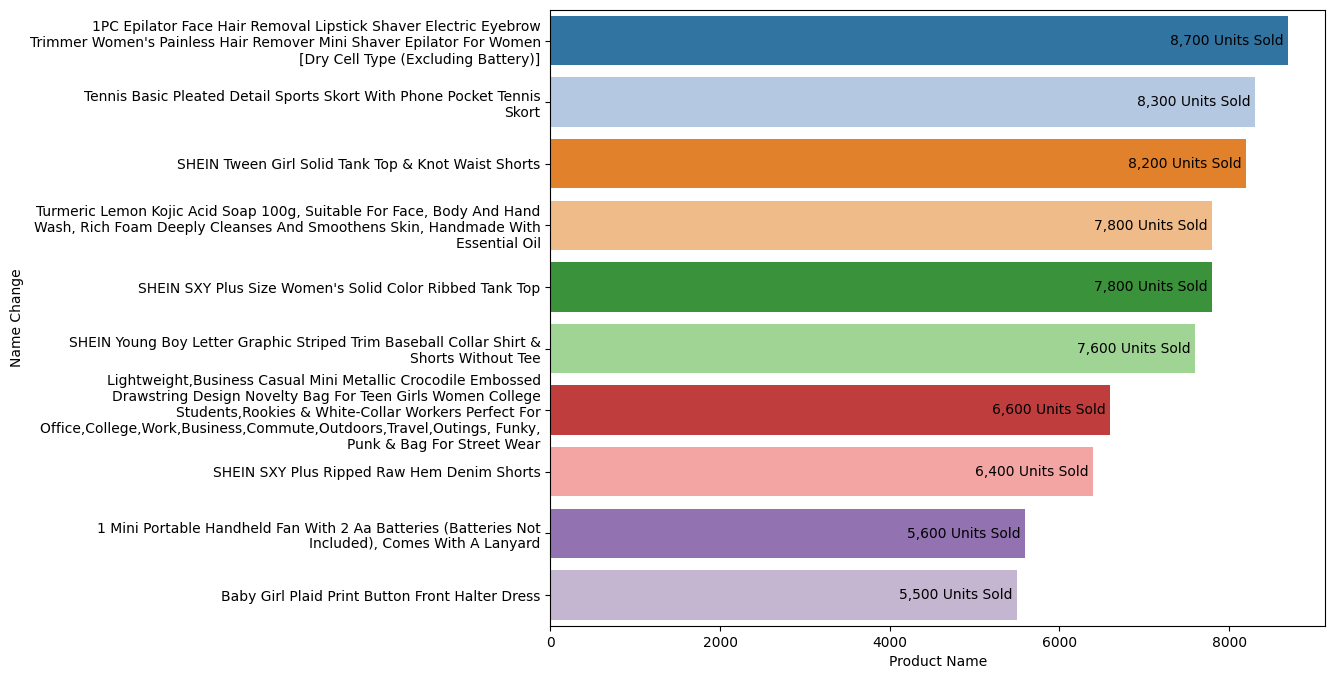

In [232]:
# Show the top 10 largest values in Units Sold
top_prod = df.nlargest(10, 'Units Sold')
# Use textwrap module to make the text (Product Names) fit into the barplot used for visualization
top_prod['Name Change'] = top_prod['Product Name'].apply(lambda x: textwrap.fill(x))


#Visualizing the top 10 best selling products 
plt.figure(figsize=[10,8])
ax = sns.barplot(x='Units Sold', y='Name Change', data=top_prod, hue='Name Change', palette='tab20')
plt.xlabel('Product Name')

# Display each bar with the value of 'Units Sold'
for index, value in enumerate(top_prod['Units Sold']):
    label = f'{value:,} {'Units Sold '}'
    ax.text(value, index, str(label), color='black', ha="right", va='center')



plt.show()

1b. What are the 10 least-selling products?

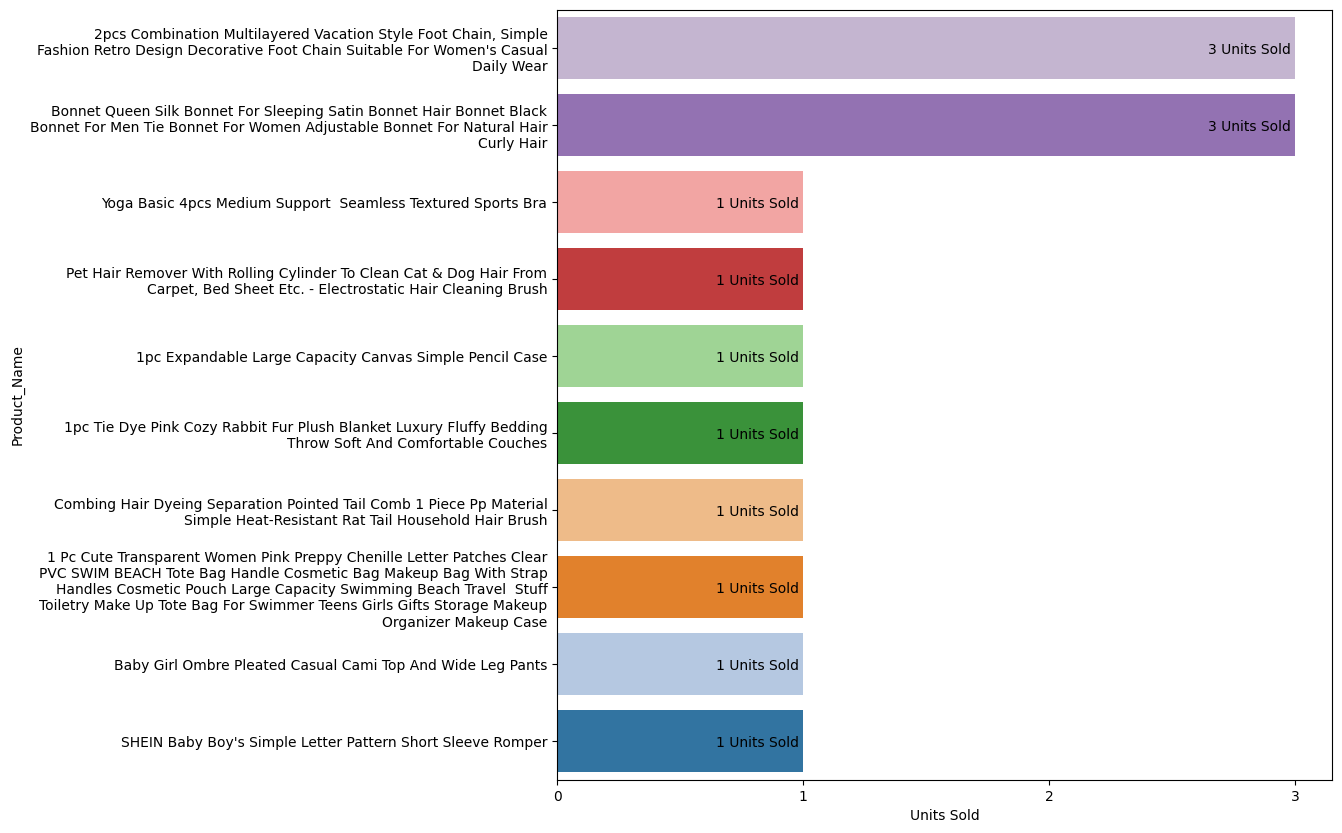

In [233]:
# Filtering out the 10 products with lowest sales(Units Sold)
total_unit = df.nsmallest(10, 'Units Sold')
total_unit['Product_Name'] = total_unit['Product Name'].apply(lambda x: textwrap.fill(x))

#visualizing
plt.figure(figsize=[10,10])
ax = sns.barplot(x='Units Sold', y='Product_Name', data=total_unit,\
                 hue='Product_Name', palette='tab20',\
                 order= total_unit['Product_Name'].iloc[::-1] )

#Display Value Label
for index, value in enumerate(total_unit['Units Sold'].iloc[::-1]):
    label = f'{value} {'Units Sold'} '
    ax.text(value, index, str(label), va='center_baseline', ha='right')

# Customize x-axis ticks to display as integers
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

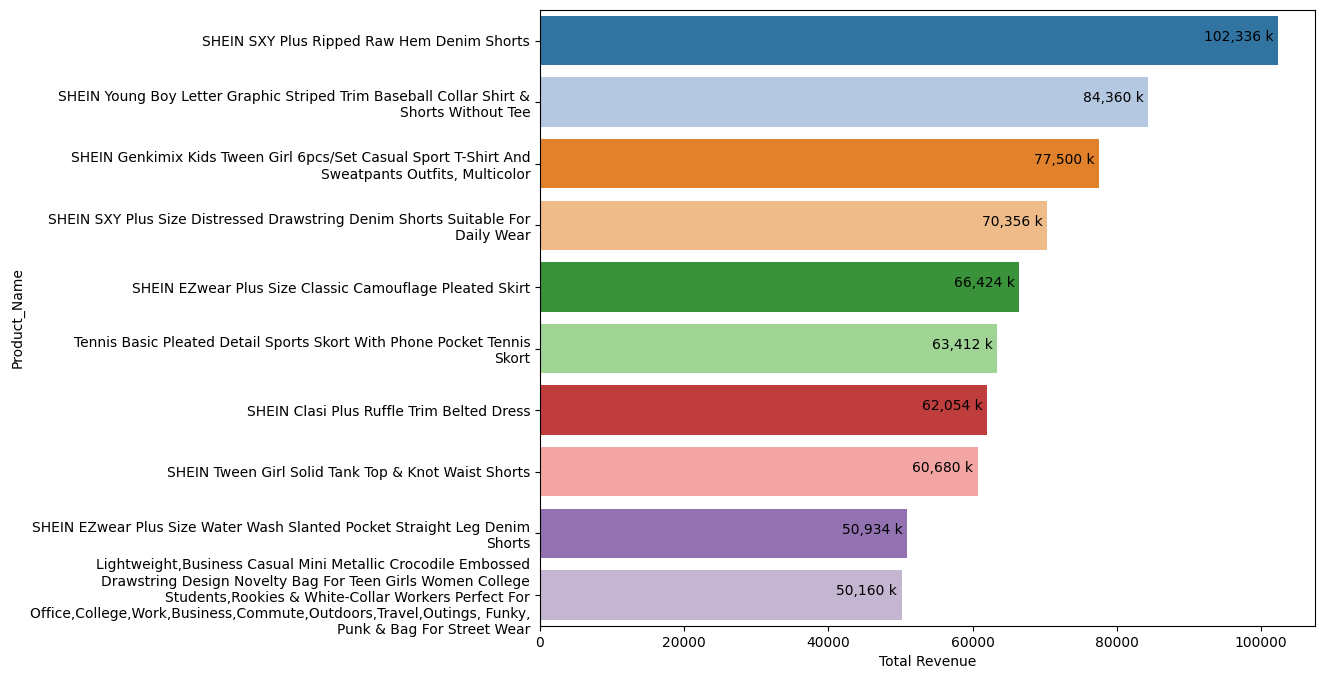

In [234]:
#2a. Revenue Analysis:Which products generate the top 10 highest revenue?

highst_p = df.nlargest(10, 'Total Revenue')
highst_p['Product_Name'] = highst_p['Product Name'].apply(lambda x: textwrap.fill(x))
highst_p
#visualizing
plt.figure(figsize=[10,8])
ax = sns.barplot(x='Total Revenue', y='Product_Name', data=highst_p, hue='Product_Name', palette='tab20')

for index, value in enumerate(highst_p['Total Revenue']):
    label = f'{value:,} {'k'} '
    ax.text(value, index, str(label), ha='right', va='baseline')


plt.show()

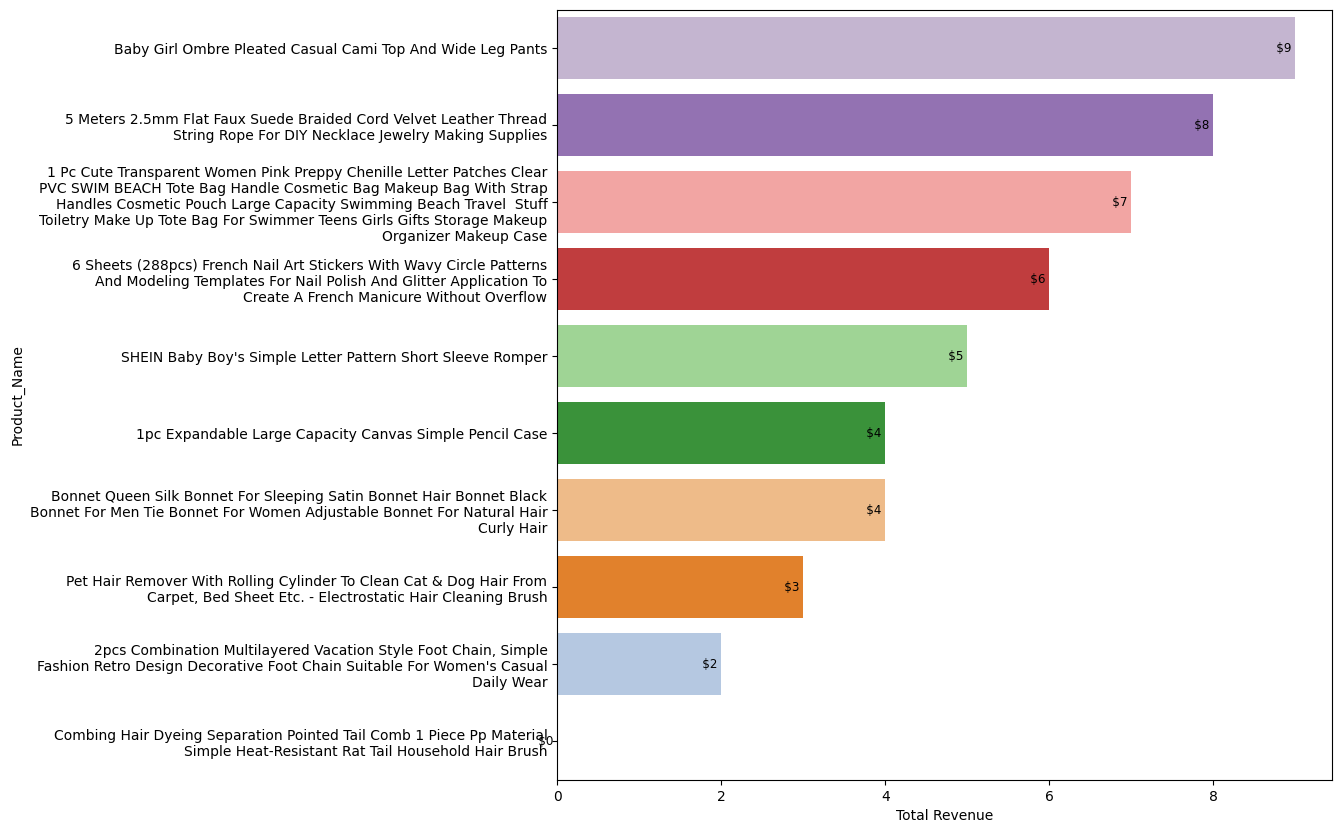

In [235]:
#2b. Revenue Analysis:Which products generate the 10 least revenue?
least_rev = df.nsmallest(10, 'Total Revenue')
least_rev['Product_Name'] = least_rev['Product Name'].apply(lambda x: textwrap.fill(x))

#visualization
plt.figure(figsize=[10,10])
ax = sns.barplot(x='Total Revenue', y='Product_Name', data=least_rev,\
                 hue='Product_Name',palette='tab20',order=least_rev['Product_Name'].iloc[::-1])

#Displaying the values in each bar
for index, value in enumerate(least_rev['Total Revenue'].iloc[::-1]):
    label = f'   {'$'}{value} '
    ax.text(value, index, str(label), va='center', ha='right', fontsize=8.57)
plt.show()

3a. Pricing Analysis: What is the average price of the products?

In [236]:
#Calcultate the mean of the price variable to get the average price of the products
average_price = df['Price'].mean()
print (f'Average Price of the products is: ${average_price:.2f}')

Average Price of the products is: $5.36


3b. How does the price range vary across different products?


<p> As seen blow: </p>

The minimum price is 0.15: This means the cheapest product in our data costs $0.15.

The maximum price is 33.60: This indicates that the most expensive product costs $33.60.

The average price is 5.36: This shows on average, products in the data are priced at $5.36. This is calculated by adding up all the prices and dividing by the number of products.

The standard deviation is 5.44: This tells us how much the prices vary from the average price. A standard deviation of 5.44 means that, on average, the prices differ from the mean by $5.44. A higher standard deviation indicates a wider range of prices and we can see this in the range of 0.15 to 33.60.

The minimum price is 0.15
The maximum price is 33.60
The average price is 5.36
The standard devition is 5.44


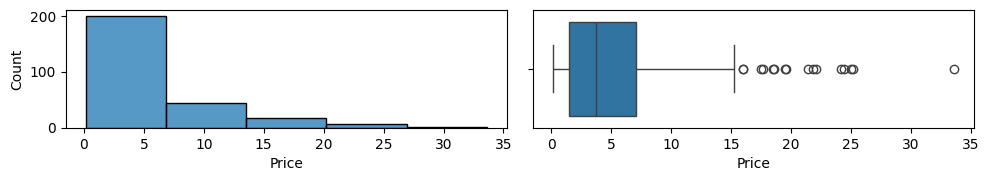

In [237]:
#Calculate the minimum, maximus, mean and standard deviation to see the price distribution
min_price = df['Price'].min()
max_price = df['Price'].max()
mean_price = df['Price'].mean()
std_price = df['Price'].std()


print(f'The minimum price is {min_price:.2f}')
print(f'The maximum price is {max_price:.2f}')
print(f'The average price is {mean_price:.2f}')
print(f'The standard devition is {std_price:.2f}')

#Visualization
plt.figure(figsize=[10,5])
plt.subplot(3,2,1)
ax = sns.histplot(df['Price'], bins=5, kde=False)

plt.subplot(3,2,2)
ax = sns.boxplot(x='Price', data=df)

plt.tight_layout()
plt.show()

# 3C. Which products have the highest and lowest prices?

We can clearly see that the result below further confirmed the output above for minimum and maximum price
It shows that the product with the highest price cost $33.6 while the lowest priced product cost $0.15

In [238]:
#Group columns 
product_price = df.groupby('Product Name')['Price'].sum()
highest_product_price = product_price.sort_values(ascending=False).head(1)
print(f'The product with the highest price is: {highest_product_price}')

lowest_product_price = product_price.sort_values(ascending=True).head(1)
print(f'The product with the lowest price is: {lowest_product_price}')

The product with the highest price is: Product Name
Women's Orange High-top Sneakers With Thick Sole, Thin Strap, Round Toe, Lace-up And Zipper Design, For Spring And Autumn    33.6
Name: Price, dtype: float64
The product with the lowest price is: Product Name
6 Sheets (288pcs) French Nail Art Stickers With Wavy Circle Patterns And Modeling Templates For Nail Polish And Glitter Application To Create A French Manicure Without Overflow    0.15
Name: Price, dtype: float64


# 4a. Discount Impact Analysis: How does the discount percentage affect sales volume?

1. The Correlation between discount percentage and units sold is -0.19: This means there is a weak negative relationship between the discount percentage offered and the number of units sold. A correlation of -0.19 suggests that as discounts increase, the number of units sold tends to decrease slightly, but this relationship is not very strong.

2. Intercept: 1498.95: In using regression analysis, the intercept shows the predicted value of the dependent variable (units sold) when the independent variable (discount percentage) is zero. Here, it suggests that if no discount is given, the estimated number of units sold would be 1498.95.

3. Coefficient: -1543.37: The coefficient shows how much the dependent variable (units sold) is expected to change when the independent variable (discount percentage) changes by one unit. A coefficient of -1543.37 means that for each 1% increase in discount, the number of units sold is expected to decrease by 1543.37 units. This negative coefficient aligns with the negative correlation, suggesting that higher discounts are associated with lower sales, though the effect is not very strong based on the correlation value.

The Correlation between discount percentage and units sold: is -0.19
Intercept: 1498.95
Coefficient: -1543.37


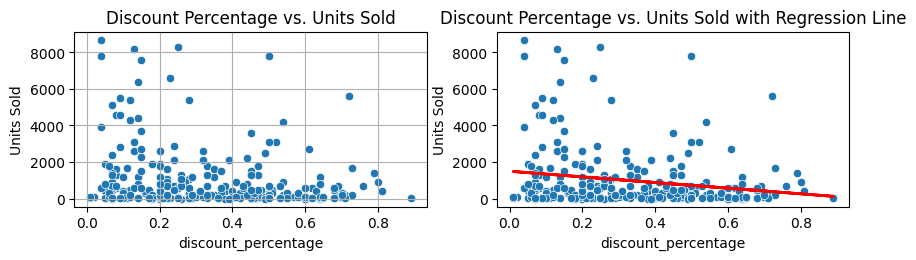

In [239]:

#Convert the discount column to percentage
df['discount_percentage'] = df['Discount'] /100

#Calculate the correlation coefficient to quantify the strength of the relationship.
co_relation = df[['discount_percentage', 'Units Sold']].corr().iloc[0,1]
print(f'The Correlation between discount percentage and units sold: is {co_relation:.2f}')

#Fitting a Regression Model
#Prepare Data
x = df[['discount_percentage']].values
y = df['Units Sold'].values

#Fit the Model
model = LinearRegression()
model.fit(x,y)

#Make predictions
predictions = model.predict(x)

#Print coefficients
print(f'Intercept: {model.intercept_:.2f}')
print(f'Coefficient: {model.coef_[0]:.2f}')

#Visualization 
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
ax = sns.scatterplot(x='discount_percentage', y='Units Sold', data=df)
plt.title('Discount Percentage vs. Units Sold')
plt.grid(True)

#Visualization for regression model 
plt.subplot(2,2,2)
ax = sns.scatterplot(x='discount_percentage', y='Units Sold', data=df)
plt.plot(df['discount_percentage'], predictions, color='red', linewidth=2)
plt.title('Discount Percentage vs. Units Sold with Regression Line')


plt.show()


# 4b. Are there any products with high discounts but low sales?

Below we can see the top 10 products with high discount rate but low Units of product sold. This further serve as proof of the earlier -0.19 correlation output showing that as discount increases, unit sold decreases.

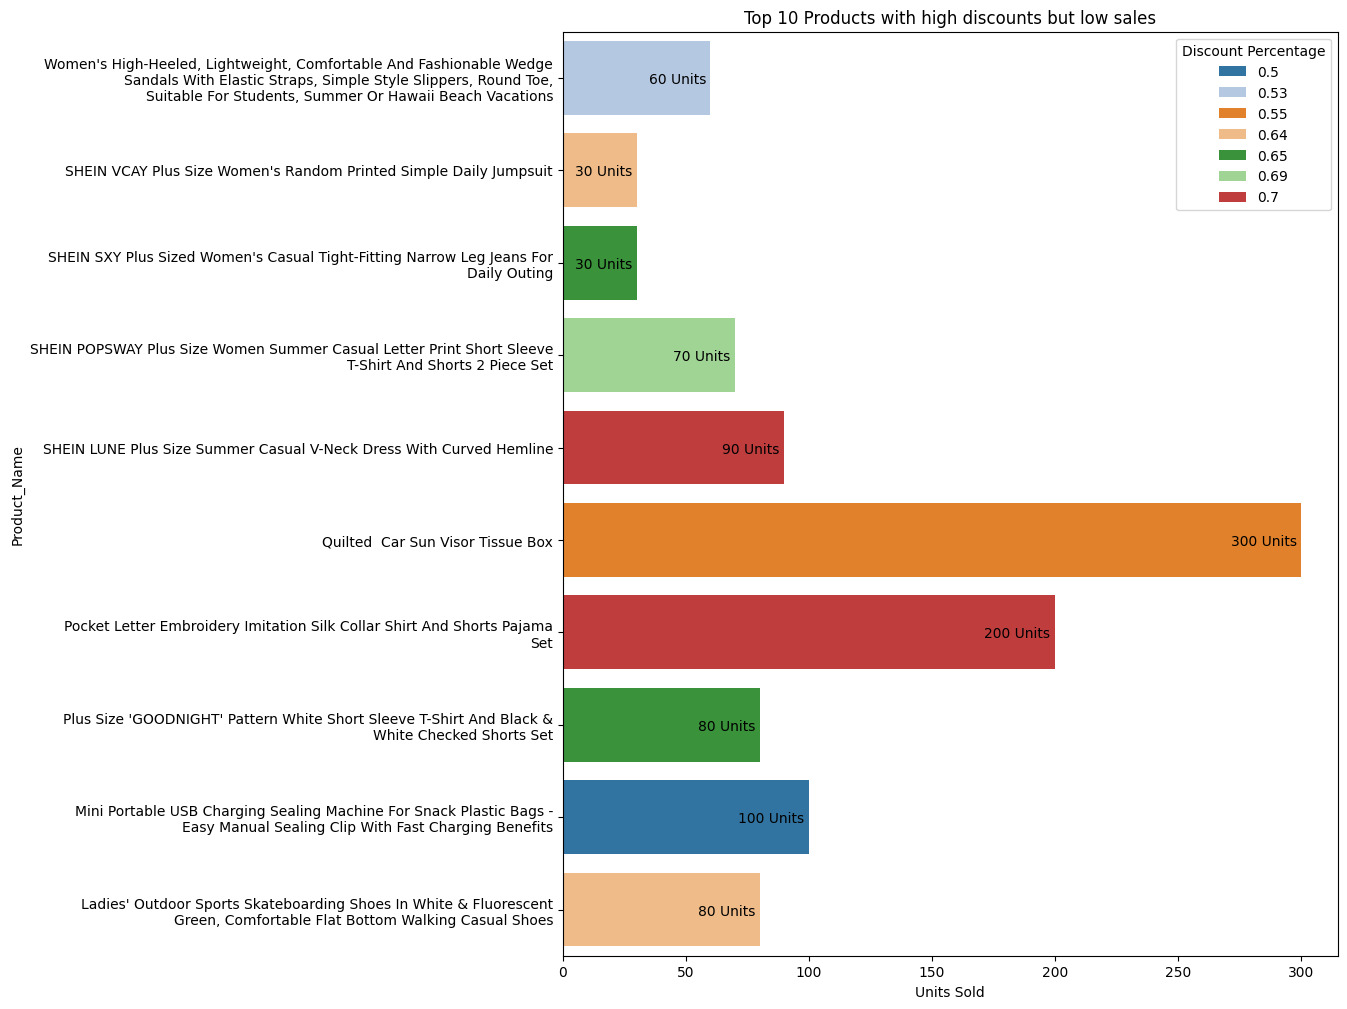

In [240]:
#Defining threshold for high discount as 50% and low sales as the median value of units sold
high_dis = 0.50
low_sale = df['Units Sold'].median()

high_disc_low_sales = df[
    (df['discount_percentage'] >= high_dis) &
    (df['Units Sold'] <= low_sale)
]

low_sale_high_discount = high_disc_low_sales.sort_values(by=['Product Name','discount_percentage', 'Units Sold'], \
                                                         ascending=False).head(10).reset_index(drop=True)
#ls_sort = low_sale_high_discount.head(10).reset_index(drop=True)
low_sale_high_discount['Product_Name'] = low_sale_high_discount['Product Name'].apply(lambda x: textwrap.fill(x))
#visualization
plt.figure(figsize=[10,12])
ax = sns.barplot(x='Units Sold', y='Product_Name', hue='discount_percentage', data=low_sale_high_discount, palette='tab20')
plt.title('Top 10 Products with high discounts but low sales')
plt.legend(title='Discount Percentage')

#Display bar label
for index, value in enumerate(low_sale_high_discount['Units Sold']):
    label = f'{value} {'Units '}'
    ax.text(value, index, str(label), va='center_baseline', ha='right')



# 4c. Which products have the highest discounts, and how does that correlate with their sales?

Again looking at the top 10 products with the highest discount rate, we can see that the units sold is not in the highest range. 

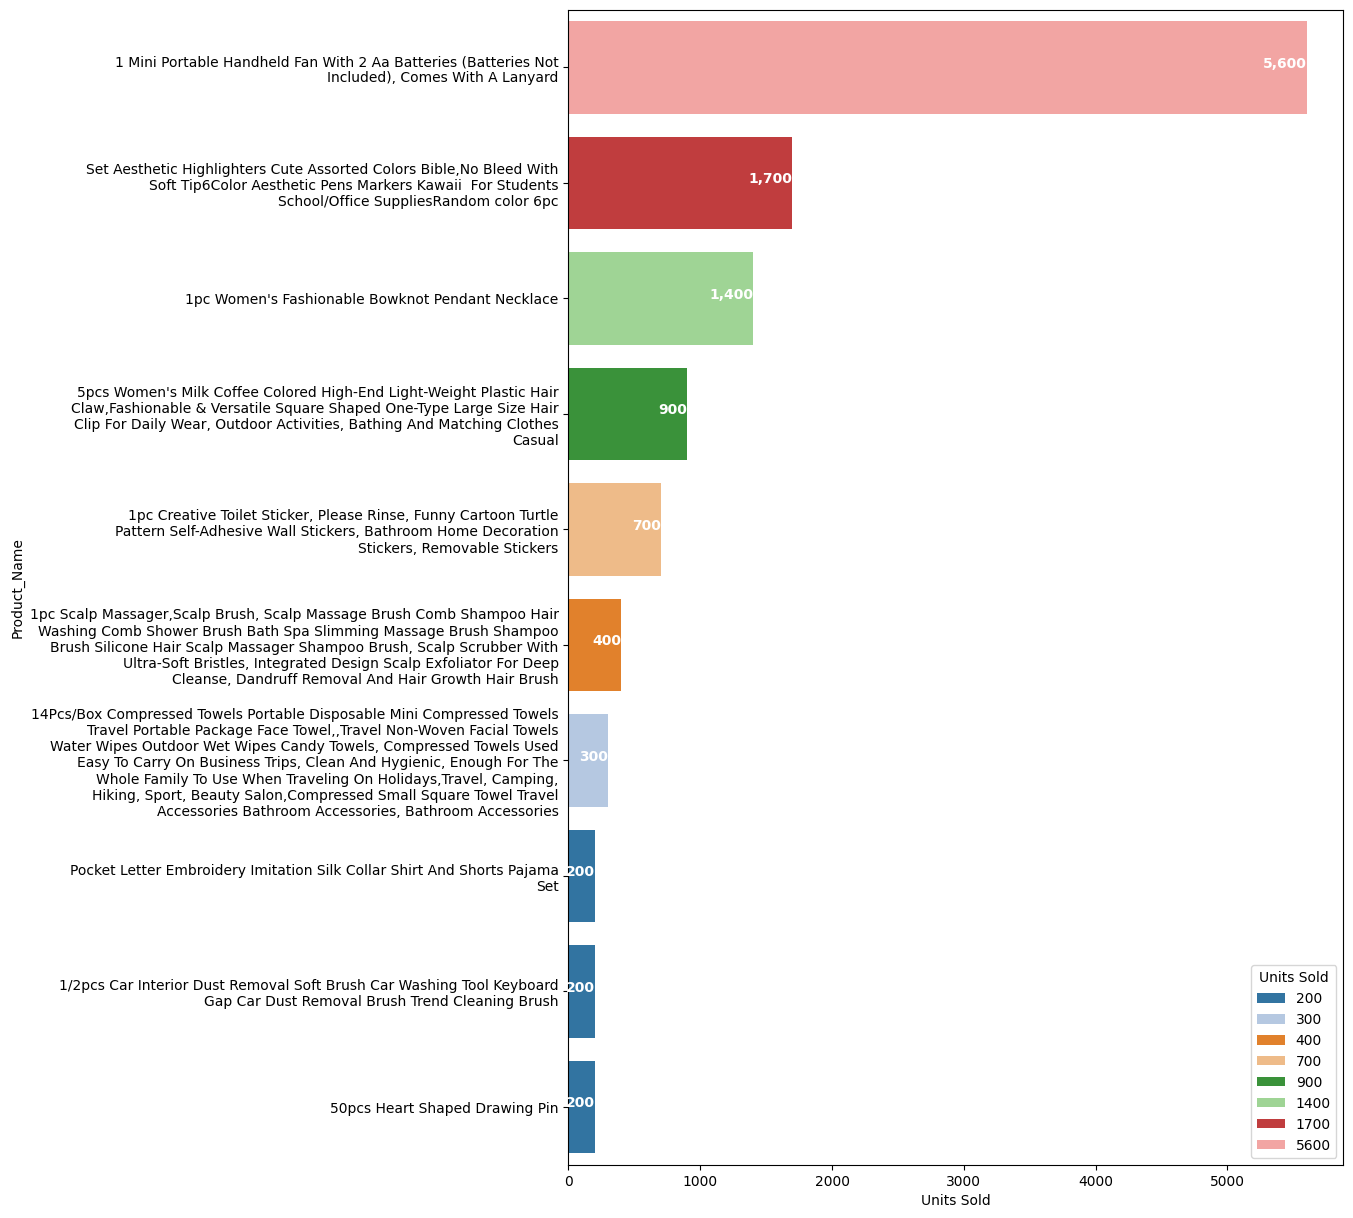

In [241]:
#Defining threshold for highest discount as 70% 
high_discount = 0.7
highest_dis_product = df[
    (df['discount_percentage'] >= high_discount)
]

sort_product = highest_dis_product.sort_values(by=['Units Sold'], ascending=False).head(10)\
                                                    .reset_index()
sort_product['Product_Name'] = sort_product['Product Name'].apply(lambda x: textwrap.fill(x))

#Visualization
plt.figure(figsize=[10,15])
ax = sns.barplot(x='Units Sold', y='Product_Name', hue='Units Sold', \
                 data=sort_product, palette='tab20')

#Display bar label
for index, value in enumerate(sort_product['Units Sold']):
    label = f'{value:,}'
    ax.text(value, index, label, va='baseline', ha='right', color='white', fontweight='bold')


# 5a. Profitability Analysis: Which products are the most profitable?
Below we can see the top 10 products with the highest revenue

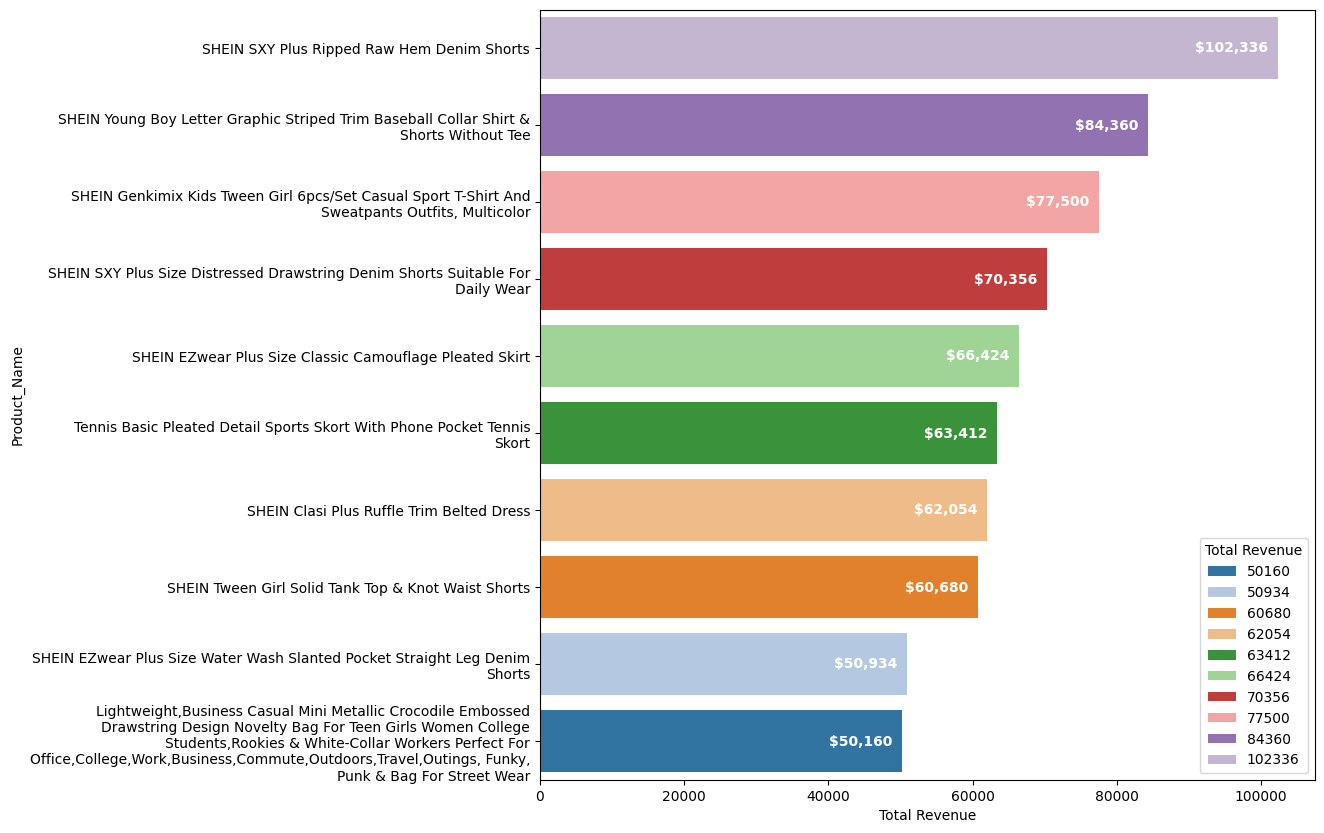

In [242]:

df['Total Revenue'] = df['Total Revenue'].astype(int)
profit_prod = df.sort_values(by=['Total Revenue'], ascending=False).head(10).reset_index()
profit_prod['Product_Name'] = profit_prod['Product Name'].apply(lambda x: textwrap.fill(x))

#Visualization
plt.figure(figsize=[10,10])
ax = sns.barplot(x='Total Revenue', y='Product_Name', data=profit_prod,\
                 hue='Total Revenue', palette='tab20')

#Display bar label
for index, value in enumerate(profit_prod['Total Revenue']):
    label = f'${value:,}  '
    ax.text(value, index, str(label), va='center', ha='right', color='white', fontweight='bold')


# 5b. How does the profitability vary across different products?
To determine how profitability vary across the products, we have to calculate the main price after the discount has been applied
This will help us calculate the profit on each sale. After this, we then go ahead to determine the profit by product.
The output shows us the top 10 products yielding the highest profit. 

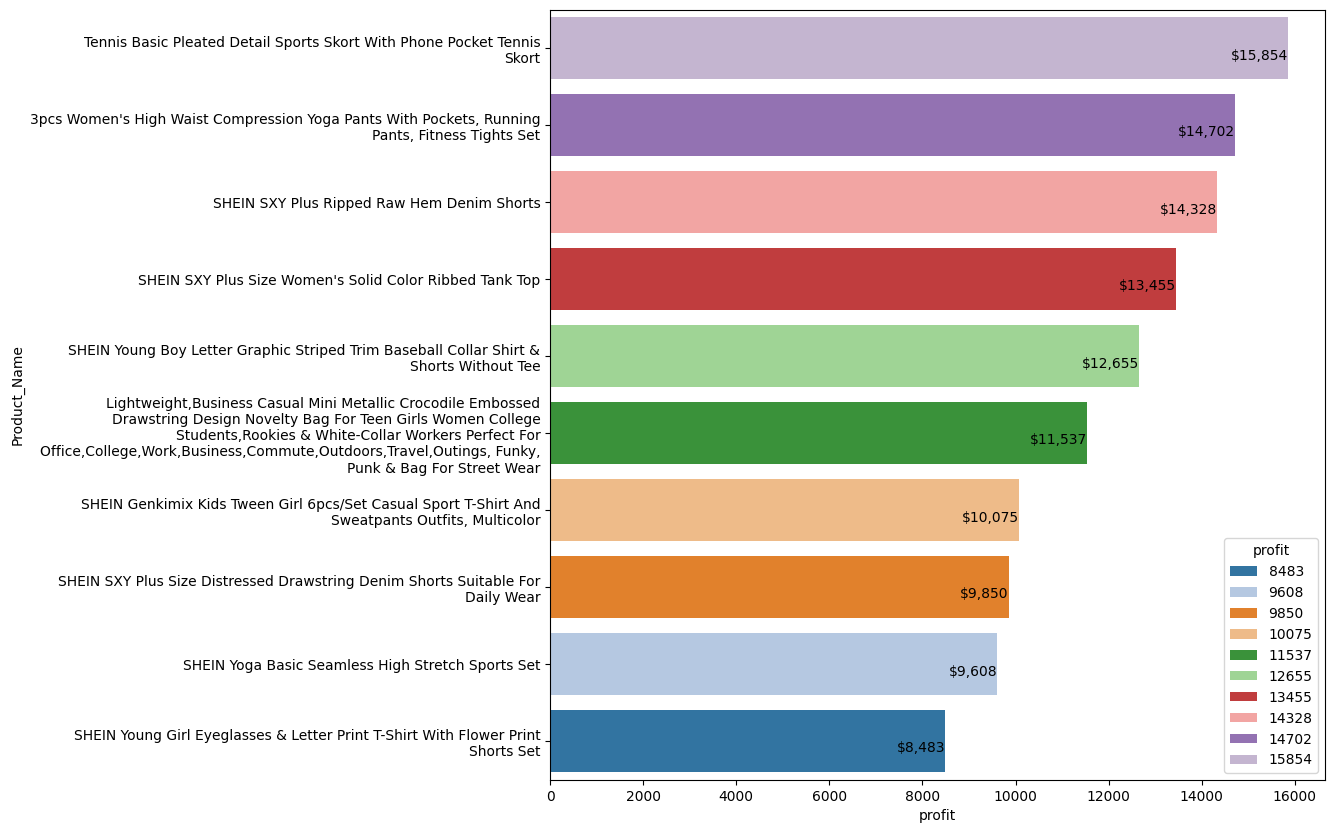

In [243]:
# Calculate Selling Price After Discount
df['sales_price_after_discount'] = df['Price'] * (1-df['discount_percentage'])

# Calculate Profit Total Revenue - Sales 
df['profit'] = df['Total Revenue'] - (df['sales_price_after_discount'] * df['Units Sold']).astype(int)

# Aggregate profit by product
profit_by_product = df.groupby('Product Name')['profit'].sum().reset_index()

# Sort the DataFrame by Profit in descending order
profit_by_product_sorted = profit_by_product.sort_values(by='profit', ascending=False).head(10).reset_index()
profit_by_product_sorted['Product_Name'] = profit_by_product_sorted['Product Name'].apply(lambda x: textwrap.fill(x))

#Visualization
plt.figure(figsize=[10,10])
ax = sns.barplot(x='profit', y='Product_Name', data=profit_by_product_sorted, palette='tab20',\
            hue='profit')

for index, value in enumerate(profit_by_product_sorted['profit']):
    label = f'${value:,}'
    ax.text(value, index, str(label), va='top', ha='right')

plt.show()


# Conclusion

In this analysis, we explored several key questions about our eCommerce products, including top sellers, revenue generators, pricing, and the impact of discounts on sales. Here are the main findings and recommendations:

1. Top-Selling and Least-Selling Products: We identified the top 10 best-selling and least-selling products. This information helps us understand which products are popular and which are not performing well.

2. Revenue Generation: We found the products generating the highest and lowest revenues. This is crucial for understanding which items contribute most to our earnings.

3. Pricing Insights: The average price of products, as well as the price range across different items, were analyzed. We also identified the highest and lowest-priced products. The standard deviation calculated is 5.44. This tells us how much the prices vary from the average price.A higher standard deviation indicates a wider range of prices and we can see this in the range of 0.15 to 33.60.

4. Discounts and Sales: Our analysis showed a weak negative correlation (-0.19) between discount percentage and units sold. This means that higher discounts slightly decrease the number of units sold, contrary to what might be expected. The intercept (1498.95) suggests that without discounts, an estimated 1498.95 units are sold. The coefficient (-1543.37) indicates that for each 1% increase in discount, sales decrease by approximately 1543 units.

# Recommendations

1. Explore Other Factors Influencing Sales: Since the correlation between discounts and sales is weak and negative, it's important to explore other factors that might affect sales. These could include product quality, brand reputation, marketing efforts, seasonal trends, or customer preferences. Understanding these factors can help tailor strategies more effectively.

2. Reevaluate Discount Strategies: Given that higher discounts do not necessarily lead to increased sales, it may be beneficial to reassess the discounting approach. Consider whether discounts are being applied to the right products or at the right times, and explore alternative promotions or value-added services.

3. Focus on High Revenue and Profitable Products: Prioritize products that generate the most revenue and have the highest profitability. Investing in marketing these products or expanding their offerings could yield better returns.

4. Improve Low-Performing Products: For products with low sales or revenue, consider improving their visibility, adjusting their prices, or re-evaluating their place in the market.